In [1]:
using CovidSim

┌ Info: Precompiling CovidSim [top-level]
└ @ Base loading.jl:1278


In [2]:
seed_1_6 = seed_case_gen(1, [0,3,3,0,0], 5, nil, agegrps)
seed_6_12 = seed_case_gen(8, [0,6,6,0,0], 5, nil, agegrps)

(::CovidSim.var"#scase#81"{Int64,Array{Int64,1},Int64,Int64,UnitRange{Int64}}) (generic function with 1 method)

In [7]:
cd("/Users/lewis/Dropbox/Online Coursework/Covid/src")
locale = 4013 # Phoenix, Maricopa County
alldict, evn, series = run_a_sim(180, locale, silent=true,
        spreadcases=[], 
        runcases=[seed_1_6, seed_6_12]);
geo = alldict["geo"];

*** seed day 1 locale 4013....
*** seed day 8 locale 4013....
at day 10 r0 = 1.4
at day 20 r0 = 1.41
at day 30 r0 = 1.4
at day 40 r0 = 1.39
at day 50 r0 = 1.44
at day 60 r0 = 1.45
at day 70 r0 = 1.4
at day 80 r0 = 1.35
at day 90 r0 = 1.25
at day 100 r0 = 1.11
at day 110 r0 = 0.82
at day 120 r0 = 0.63
at day 130 r0 = 0.51
at day 140 r0 = 0.43
at day 150 r0 = 0.44
at day 160 r0 = 0.43
at day 170 r0 = 0.44
at day 180 r0 = 0.42
Simulation completed for 180 days.


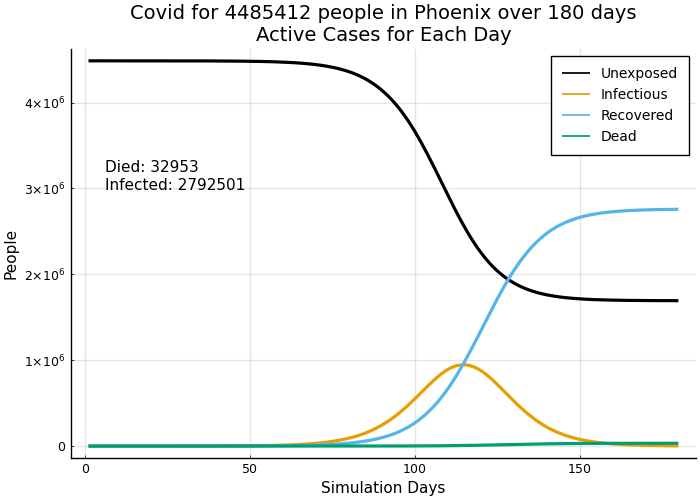

In [9]:
cumplot(series, locale, geo=geo)

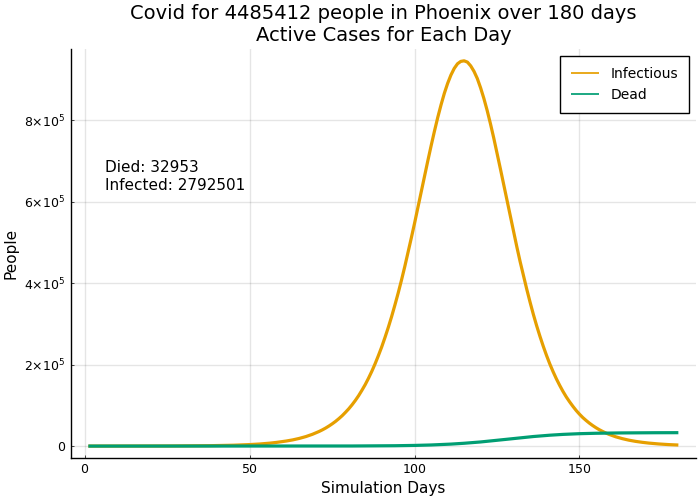

In [10]:
cumplot(series, locale, [infectious, dead], geo=geo)

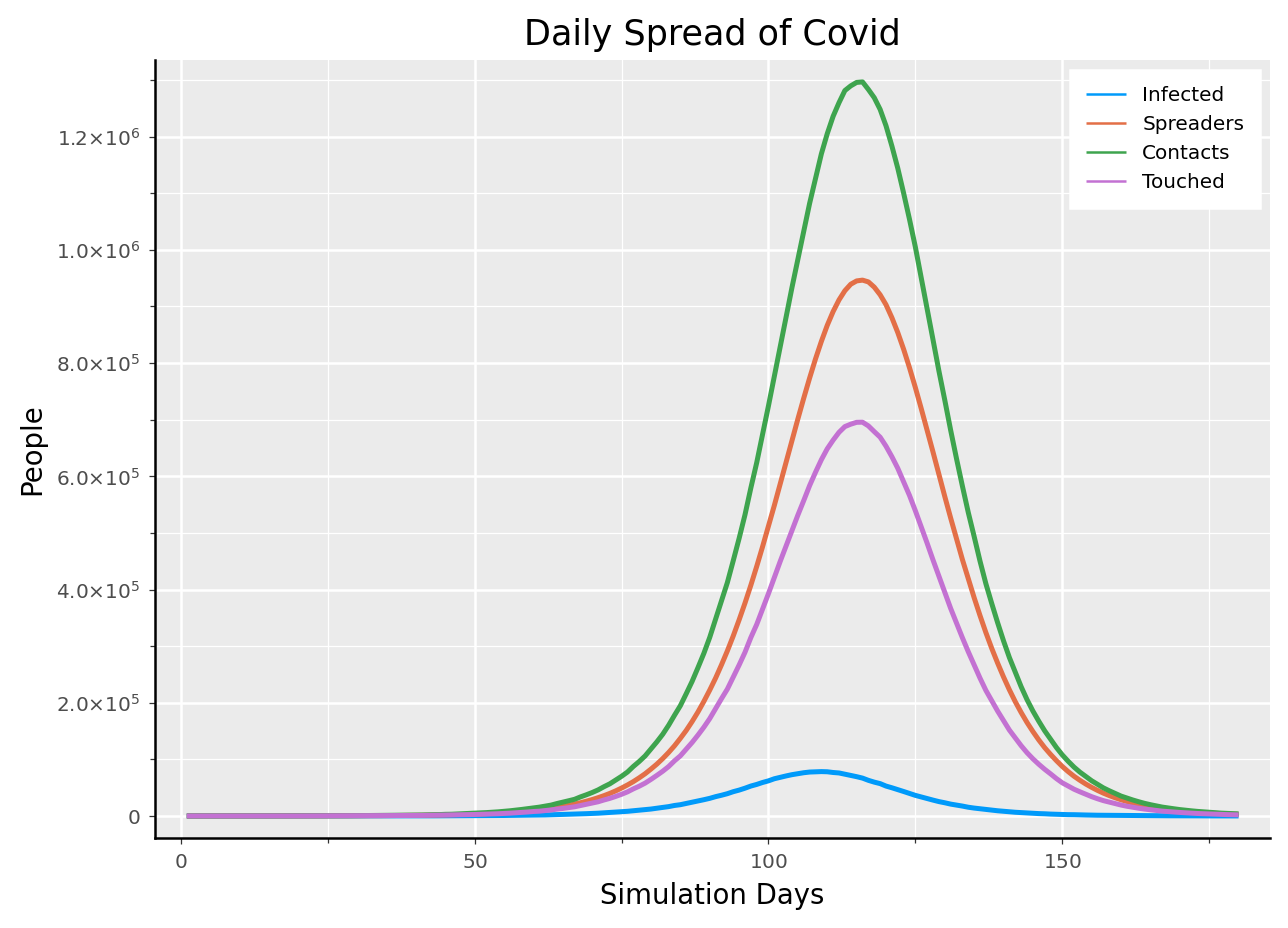

In [11]:
dayplot(spreadq,[:spreaders, :contacts, :touched])

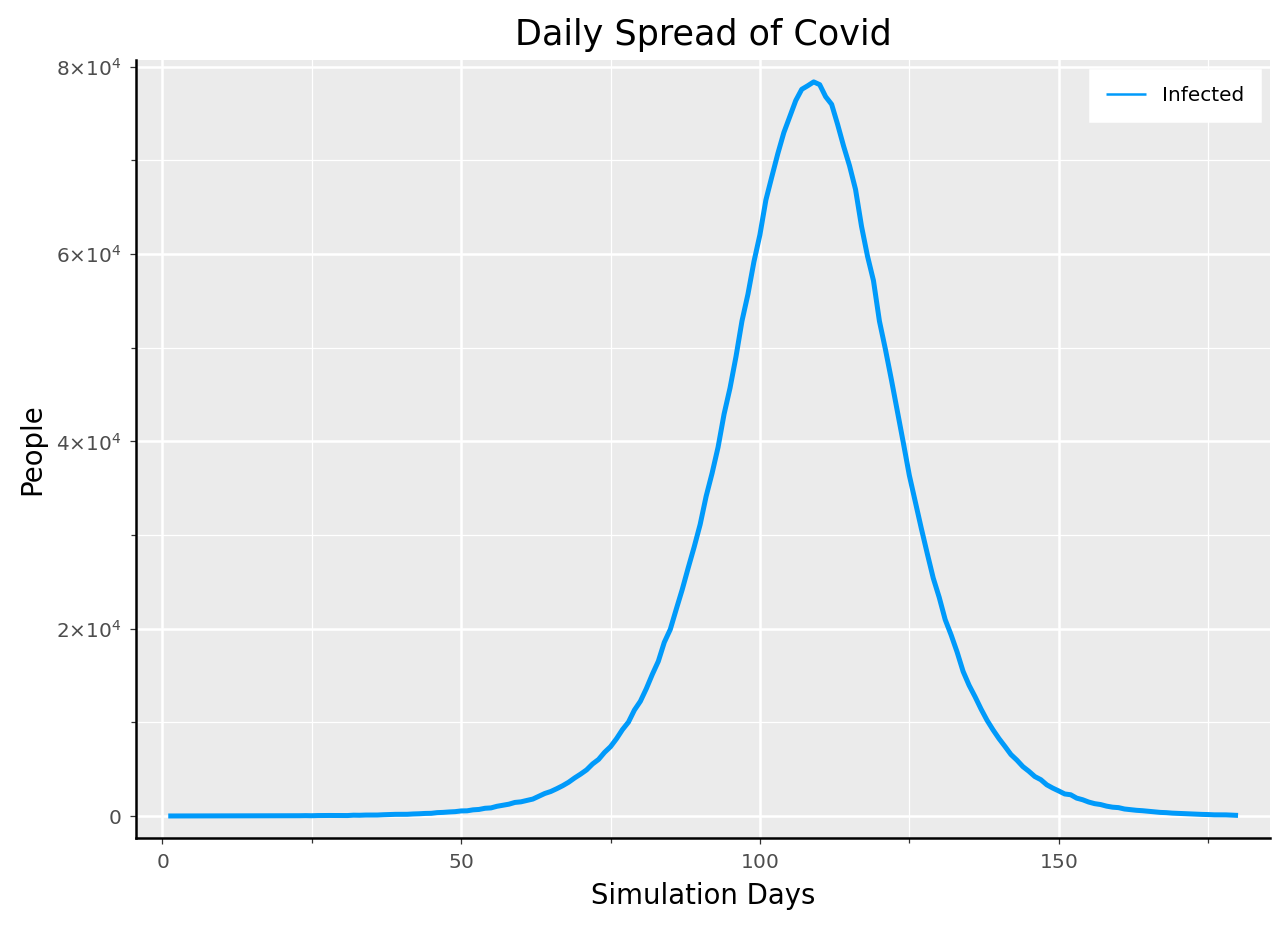

In [12]:
dayplot(spreadq)

#### Social Distancing

Here is a case when social distancing starts on day 60 with 75% compliance and is rather strong in terms of contacts and touches.

In [13]:
str_60 = sd_gen(start=60, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, env, series = run_a_sim(180, locale, silent=true,
    spreadcases=[str_60], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 4013....
*** seed day 8 locale 4013....
at day 10 r0 = 1.35
at day 20 r0 = 1.42
at day 30 r0 = 1.41
at day 40 r0 = 1.39
at day 50 r0 = 1.39
at day 60 r0 = 0.81
at day 70 r0 = 0.79
at day 80 r0 = 0.83
at day 90 r0 = 0.75
at day 100 r0 = 0.81
at day 110 r0 = 0.77
at day 120 r0 = 0.78
at day 130 r0 = 0.78
at day 140 r0 = 0.78
at day 150 r0 = 0.79
at day 160 r0 = 0.8
at day 170 r0 = 0.8
at day 180 r0 = 0.79
Simulation completed for 180 days.


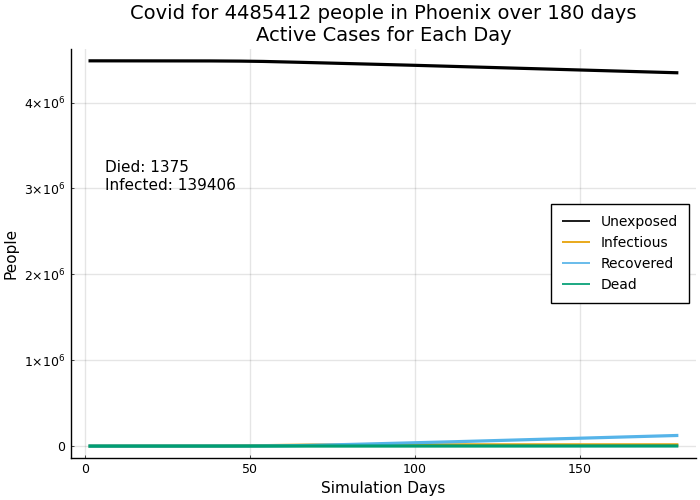

In [14]:
cumplot(series, locale, geo=geo)

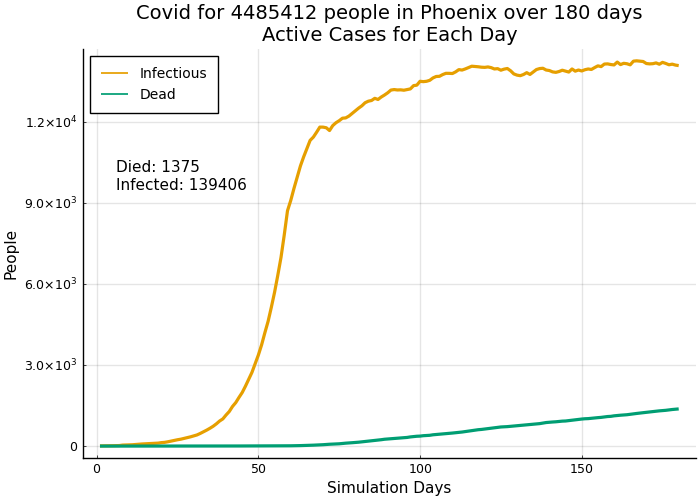

In [15]:
cumplot(series, locale, [infectious, dead],geo=geo)

In [18]:
str_50 = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4));
alldict, env, series = run_a_sim(180, locale, silent=true,
    spreadcases=[str_50],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 4013....
*** seed day 8 locale 4013....
at day 10 r0 = 1.38
at day 20 r0 = 1.45
at day 30 r0 = 1.4
at day 40 r0 = 1.43
at day 50 r0 = 0.79
at day 60 r0 = 0.8
at day 70 r0 = 0.8
at day 80 r0 = 0.81
at day 90 r0 = 0.77
at day 100 r0 = 0.8
at day 110 r0 = 0.8
at day 120 r0 = 0.79
at day 130 r0 = 0.81
at day 140 r0 = 0.78
at day 150 r0 = 0.78
at day 160 r0 = 0.8
at day 170 r0 = 0.79
at day 180 r0 = 0.79
Simulation completed for 180 days.


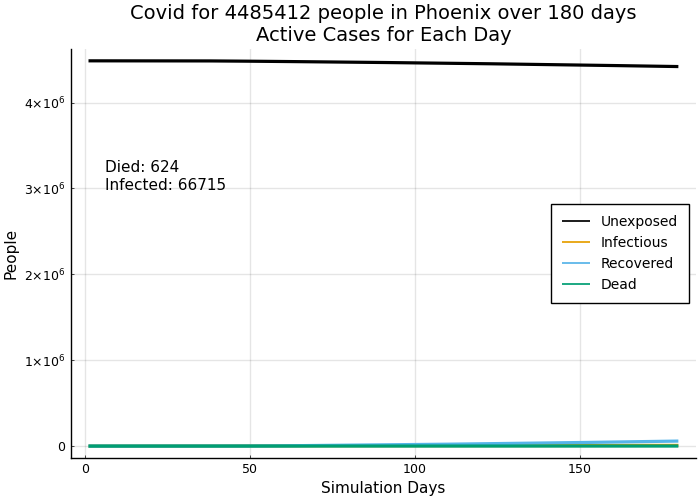

In [19]:
cumplot(series, locale, geo=geo)

We cut not quite another 30% of infections compared to starting isolation 10 days later.  With exponential growth, 
when you start mitigation practices makes a big difference. 

Looking at this the authorities could say, "We are in great shape; we have this virus licked." 

Let's see what happens if we open up to where we were before after 30 days of social distancing.

In [26]:
bismarck = 38015
open_all = sd_gen(start=80, comply=0.0, cf=(.2,1.8), tf=(.18,.62)); 
alldict, env, series = run_a_sim(180, bismarck, silent=true,
    spreadcases=[str_50,open_all],
    runcases=[seed_1_6, seed_6_12]);  

*** seed day 1 locale 38015....
*** seed day 8 locale 38015....
at day 10 r0 = 1.4
at day 20 r0 = 1.37
at day 30 r0 = 1.39
at day 40 r0 = 1.36
at day 50 r0 = 0.76
at day 60 r0 = 0.71
at day 70 r0 = 0.7
at day 80 r0 = 1.18
at day 90 r0 = 1.15
at day 100 r0 = 0.99
at day 110 r0 = 0.86
at day 120 r0 = 0.71
at day 130 r0 = 0.58
at day 140 r0 = 0.55
at day 150 r0 = 0.5
at day 160 r0 = 0.52
at day 170 r0 = 0.51
at day 180 r0 = 0.49
Simulation completed for 180 days.


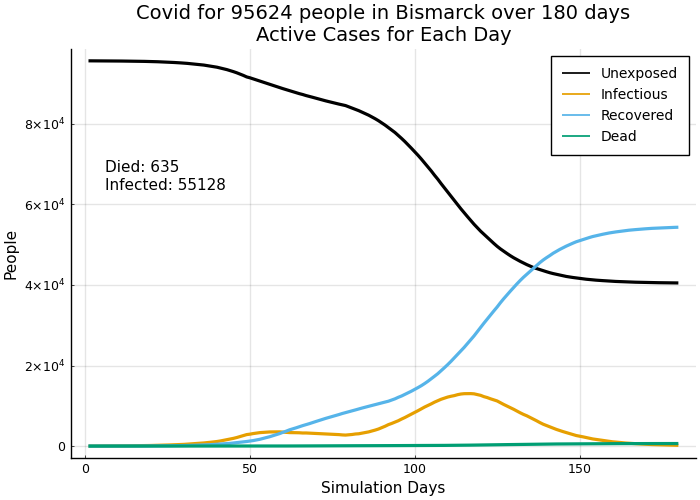

In [27]:
cumplot(series, bismarck, geo=geo)

It's kind of like nothing happened because of social distancing. We stopped the rise early; then we started the rise.
We ended up in nearly the same place, except everything started later and the simulation ends before
the infection curve burns itself out.

|              | Infections | Deaths|
|--------------|---------|----------|
|No restrictions | 2,605,750 | 27,199 |
| Restrict. on/off | 2,522,693 | 23,244 |

Because Maricopa County has a large population of over 4 million, 18 people coming in with infections takes a while to get the exponential growth curve "rolling".  What would be more typical is a double bump.  Social distancing starts after significant growth is observed; then it brings the curve down; the people cheer; social distancing ends. 

Let's see what happens in a smaller place like Omaha, Nebraska and we won't open up totally, which does get us back 
to what looks like no social distancing at all.

In [29]:
close = sd_gen(start=50, comply=.75, cf=(.3,1.2), tf=(.18,.4)); open = sd_gen(start=90, comply=.75, cf=(.2,1.5), tf=(.18,.5));
alldict, env, series = run_a_sim(180, bismarck, silent=true, 
    spreadcases=[close, open], 
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 38015....
*** seed day 8 locale 38015....
at day 10 r0 = 1.44
at day 20 r0 = 1.45
at day 30 r0 = 1.38
at day 40 r0 = 1.4
at day 50 r0 = 0.76
at day 60 r0 = 0.72
at day 70 r0 = 0.69
at day 80 r0 = 0.7
at day 90 r0 = 0.79
at day 100 r0 = 0.8
at day 110 r0 = 0.76
at day 120 r0 = 0.72
at day 130 r0 = 0.7
at day 140 r0 = 0.67
at day 150 r0 = 0.67
at day 160 r0 = 0.65
at day 170 r0 = 0.65
at day 180 r0 = 0.62
Simulation completed for 180 days.


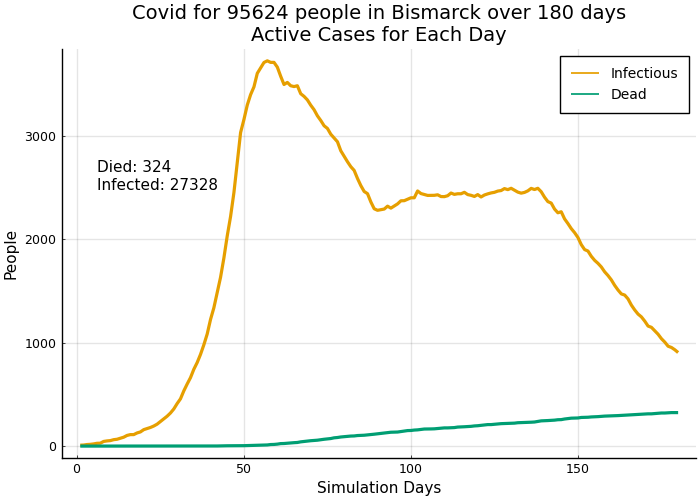

In [31]:
cumplot(series, bismarck, [infectious, dead], geo=geo)

In [32]:
alldict, env, series = run_a_sim(180, bismarck, silent=true,
    spreadcases=[],
    runcases=[seed_1_6, seed_6_12]);

*** seed day 1 locale 38015....
*** seed day 8 locale 38015....
at day 10 r0 = 1.39
at day 20 r0 = 1.38
at day 30 r0 = 1.37
at day 40 r0 = 1.36
at day 50 r0 = 1.32
at day 60 r0 = 1.27
at day 70 r0 = 1.1
at day 80 r0 = 0.81
at day 90 r0 = 0.61
at day 100 r0 = 0.52
at day 110 r0 = 0.45
at day 120 r0 = 0.45
at day 130 r0 = 0.44
at day 140 r0 = 0.43
at day 150 r0 = 0.44
at day 160 r0 = 0.42
at day 170 r0 = 0.44
at day 180 r0 = 0.45
Simulation completed for 180 days.


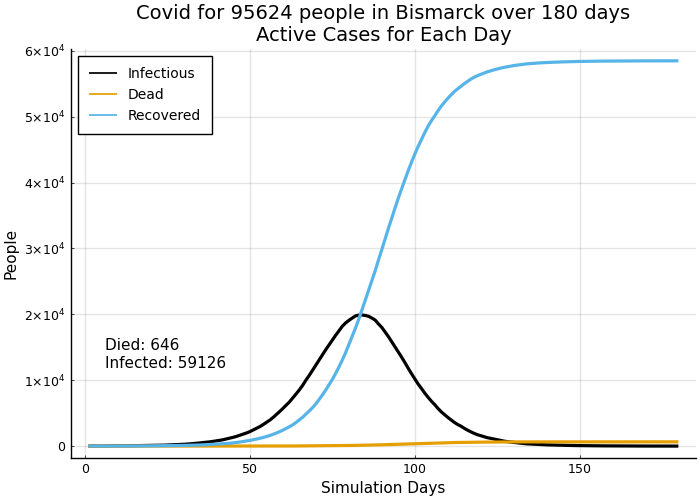

In [34]:
cumplot(series, bismarck,[infectious, dead, recovered], geo=geo)